In [2]:
import sys
from dotenv import load_dotenv
import os

load_dotenv()
project_path = os.getenv("PROJECT_PATH")
sys.path.append(project_path)

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from main.utilities.paths import (
    PATHWAY_TO_COINTEGRATION_AND_RESULTS_DF,
    PATHWAY_TO_PRICE_DF,
)

from main.model_building.backtesting_analysis.equity_curves import (
    create_eq_curve,
)

In [3]:
prices_df = pd.read_parquet(PATHWAY_TO_PRICE_DF)

In [4]:
results_df = pd.read_parquet(PATHWAY_TO_COINTEGRATION_AND_RESULTS_DF)

In [5]:
results_df.head()

,first_ticker,second_ticker,engle_test_training,pair_start_date,trading_period_mid_point_date,pair_finish_date,length_of_trading_period_days_calendar,adf_result,hurst_exponent_results,half_life_results,first_ticker_sector,second_ticker_sector,tickers_sectors_concat,sharpe_ratio_2_05_6_kalman,no_profitable_trades_2_05_6_kalman,fraction_profitable_trades_2_05_6_kalman,sharpe_ratio_2_05_6,no_profitable_trades_2_05_6,fraction_profitable_trades_2_05_6
0,SYKN,AFLN,0.001900,2003-06-02,2013-06-01,2023-06-01,7304,0.000152,0.410142,43.504045,Healthcare,Financials,Financials - Healthcare,0.009349,1.0,0.5,0.009349,1.0,0.5
1,SYKN,WMN,0.028505,2003-06-02,2013-06-01,2023-06-01,7304,0.020364,0.481251,88.366624,Healthcare,Industrials,Healthcare - Industrials,0.034586,5.0,1.0,0.034586,5.0,1.0
2,SYKN,ADBEOQ,0.021921,2003-06-02,2013-06-01,2023-06-01,7304,0.009081,0.443329,67.884768,Healthcare,Technology,Healthcare - Technology,0.020035,3.0,1.0,0.020035,3.0,1.0
3,SYKN,AEPOQ,0.007235,2003-06-02,2013-06-01,2023-06-01,7304,0.001443,0.456014,52.212298,Healthcare,Utilities,Healthcare - Utilities,0.016893,3.0,1.0,0.016893,3.0,1.0
4,SYKN,TN,0.011761,2003-06-02,2013-06-01,2023-06-01,7304,0.005689,0.478681,69.242492,Healthcare,Technology,Healthcare - Technology,0.020147,2.0,0.5,0.020147,2.0,0.5


Here we perform pairwise plots for all 6 performance metrics (3 per backtest, of which there are two)

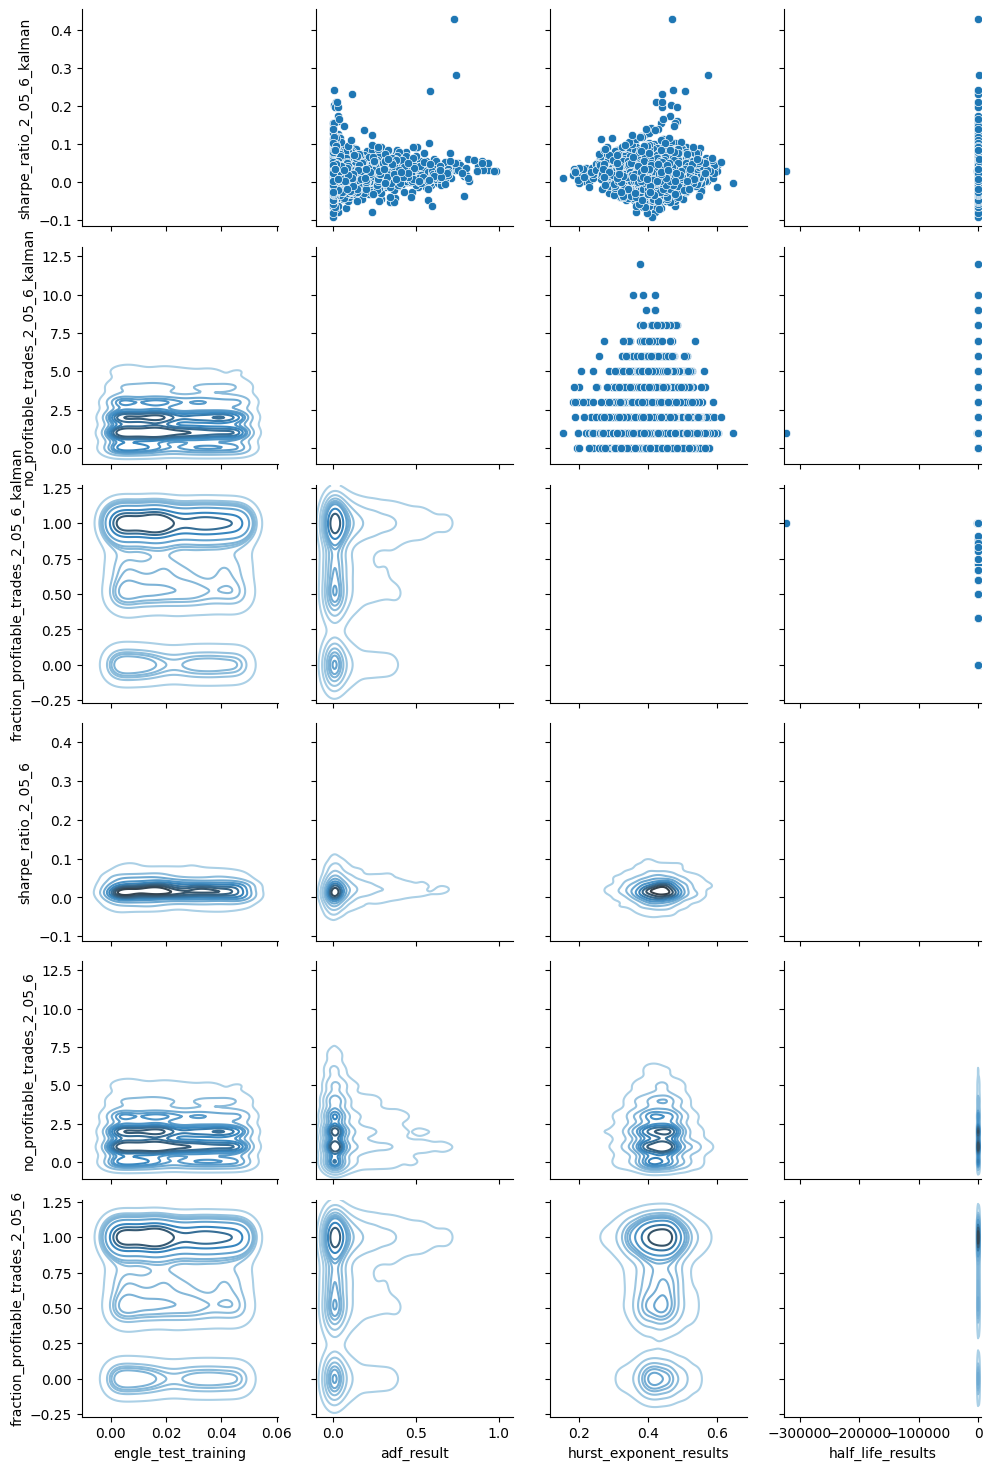

In [6]:
x_vars = [
    "engle_test_training",
    "adf_result",
    "hurst_exponent_results",
    "half_life_results",
]
y_vars = list(results_df.columns[-6:])
g = sns.PairGrid(results_df, x_vars=x_vars, y_vars=y_vars)
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")

plt.show()

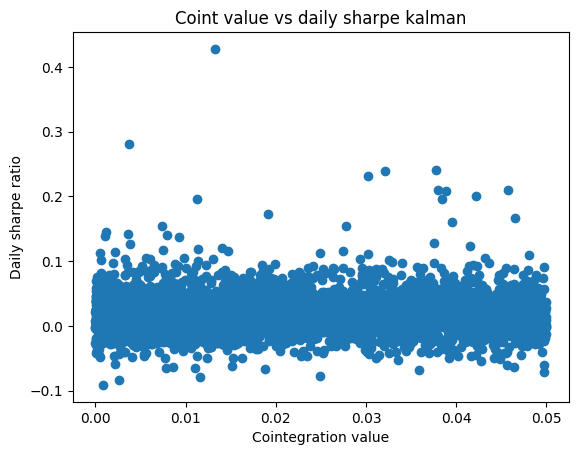

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = results_df["engle_test_training"].values
y = results_df["sharpe_ratio_2_05_6"].values
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Cointegration value")
ax.set_ylabel("Daily sharpe ratio")
ax.set_title("Coint value vs daily sharpe kalman")
plt.show()

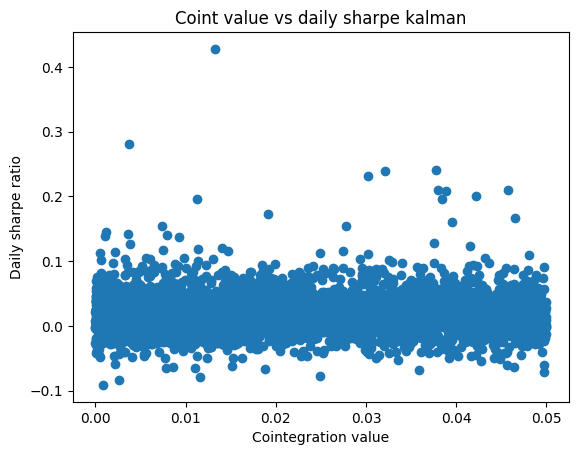

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = results_df["engle_test_training"].values
y = results_df["sharpe_ratio_2_05_6_kalman"].values
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Cointegration value")
ax.set_ylabel("Daily sharpe ratio")
ax.set_title("Coint value vs daily sharpe kalman")
plt.show()

C:\\Users\\Nelson\\Desktop\\projects\\trader_experimentation\main\model_building\backtesting_analysis\equity_curves.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result = result.fillna(method="bfill", axis=0)
C:\\Users\\Nelson\\Desktop\\projects\\trader_experimentation\main\model_building\backtesting_analysis\equity_curves.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result = result.fillna(method="ffill", axis=0)


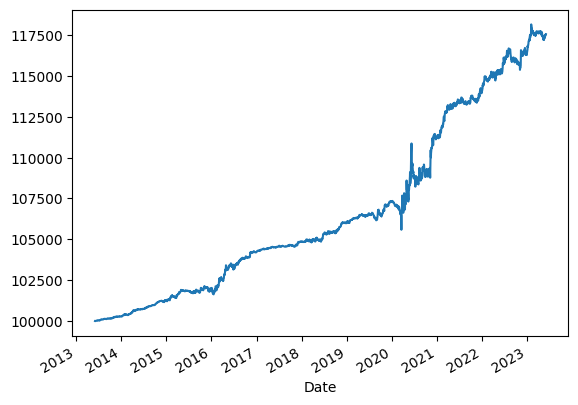

In [9]:
pnl_all = create_eq_curve(
    results_df=results_df,
)

(pnl_all / results_df.shape[0]).plot()
plt.show()

C:\\Users\\Nelson\\Desktop\\projects\\trader_experimentation\main\model_building\backtesting_analysis\equity_curves.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result = result.fillna(method="bfill", axis=0)
C:\\Users\\Nelson\\Desktop\\projects\\trader_experimentation\main\model_building\backtesting_analysis\equity_curves.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result = result.fillna(method="ffill", axis=0)


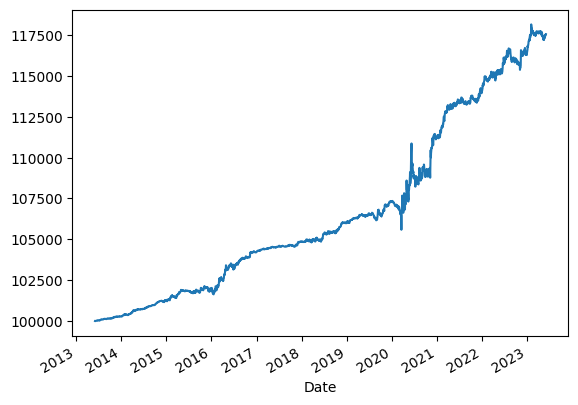

In [10]:
pnl_all_kalman = create_eq_curve(
    results_df=results_df,
    kalman=True,
)

(pnl_all_kalman / results_df.shape[0]).plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

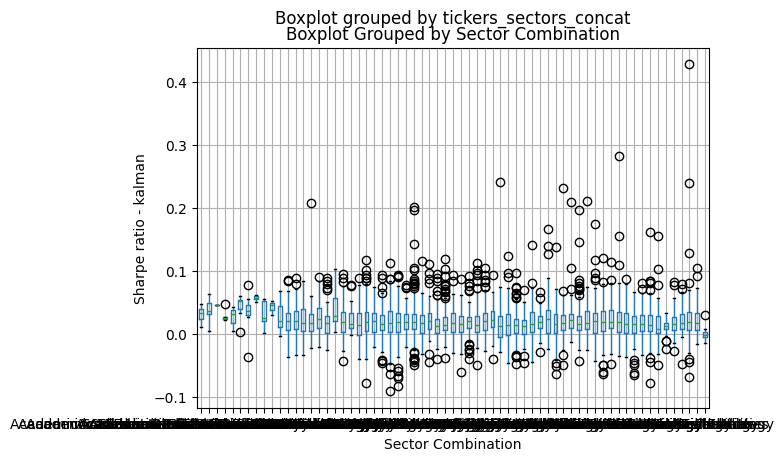

In [12]:
plt.figure(figsize=(10, 6))
results_df.boxplot(column="sharpe_ratio_2_05_6_kalman", by="tickers_sectors_concat")
plt.title("Boxplot Grouped by Sector Combination")
plt.xlabel("Sector Combination")
plt.ylabel("Sharpe ratio - kalman")
plt.show()

<Figure size 1000x600 with 0 Axes>

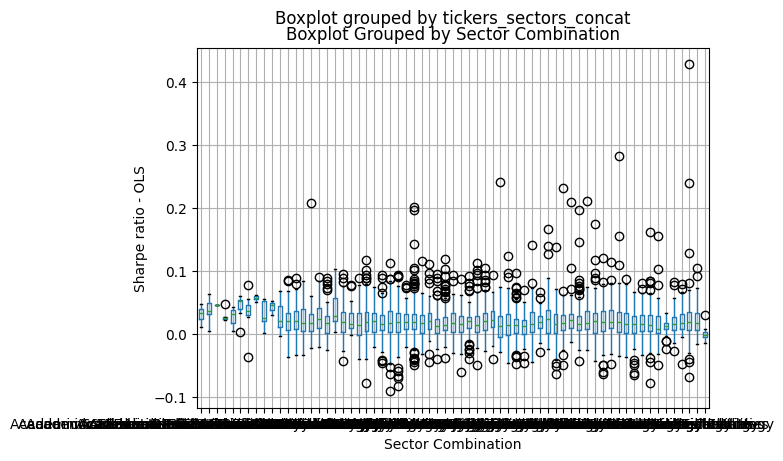

In [16]:
plt.figure(figsize=(10, 6))
results_df.boxplot(column="sharpe_ratio_2_05_6", by="tickers_sectors_concat")
plt.title("Boxplot Grouped by Sector Combination")
plt.xlabel("Sector Combination")
plt.ylabel("Sharpe ratio - OLS")
plt.show()

In [14]:
# we note that the hurst exponent and half life might be predictive. Let's rerun our eq curve with these values in tighter ranges

pnl_cond_1_df = results_df[
    (results_df["half_life_results"] > 25)
    & (results_df["half_life_results"] < 75)
    & (results_df["hurst_exponent_results"] > 0.45)
    & (results_df["hurst_exponent_results"] < 0.55)
]

C:\\Users\\Nelson\\Desktop\\projects\\trader_experimentation\main\model_building\backtesting_analysis\equity_curves.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result = result.fillna(method="bfill", axis=0)
C:\\Users\\Nelson\\Desktop\\projects\\trader_experimentation\main\model_building\backtesting_analysis\equity_curves.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result = result.fillna(method="ffill", axis=0)


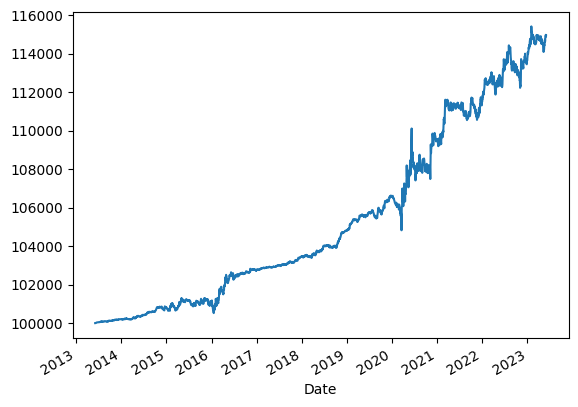

In [15]:
pnl_cond_1 = create_eq_curve(results_df=pnl_cond_1_df)

(pnl_cond_1 / pnl_cond_1_df.shape[0]).plot()
plt.show()